# **Introduction**

This report includes study about the divorce predictions among couple. For the dataset, set of questions were asked to couples participating in survey. Scores are assigned on the basis of the answers by the individual and using different predictive models, the chances of divorce can be predicted. We have implemented 2 models namely Random Forest and SVM Classifier for prediction and obtained results accordingly which are discussed further in the report.

# **About data and variables**



*   Data Set Characteristics: Multivariate, Univariate
*   Number of Instances: 170
*   Area: Life
*   Attribute Characteristics: Integer
*   Number of Attributes: 54


# **Attribute Information:**

1.	When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my wife from the beginning and correct it.
4.	When I argue with my wife, it will eventually work for me to contact him.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	My wife and most of our goals are common.
11.	I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other.
12.	My wife and I have similar values in terms of personal freedom.
13.	My husband and I have similar entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams of living with my wife are similar and harmonious
16.	We're compatible with my wife about what love should be
17.	We share the same views with my wife about being happy in your life
18.	My wife and I have similar ideas about how marriage should be
19.	My wife and I have similar ideas about how roles should be in marriage
20.	My wife and I have similar values in trust
21.	I know exactly what my wife likes.
22.	I know how my wife wants to be taken care of when she's sick.
23.	I know my wife's favorite food.
24.	I can tell you what kind of stress my wife is facing in her life.
25.	I have knowledge of my wife's inner world.
26.	I know my wife's basic concerns.
27.	I know what my wife's current sources of stress are.
28.	I know my wife's hopes and wishes.
29.	I know my wife very well.
30.	I know my wife's friends and their social relationships.
31.	I feel aggressive when I argue with my wife.
32.	When discussing with my wife, I usually use expressions such as ‘you always’ or ‘you never’.
33.	I can use negative statements about my wife's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult our discussions.
36.	I can be humiliating when we argue.
37.	My argument with my wife is not calm.
38.	I hate my wife's way of bringing it up.
39.	Fights often occur suddenly.
40.	We're just starting a fight before I know what's going on.
41.	When I talk to my wife about something, my calm suddenly breaks.
42.	When I argue with my wife, it only snaps in and I don't say a word.
43.	I'm mostly thirsty to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than argue with my wife.
46.	Even if I'm right in the argument, I'm thirsty not to upset the other side.
47.	When I argue with my wife, I remain silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell her about my wife's inadequacy.
53.	When I discuss it, I remind her of my wife's inadequate issues.
54.	I'm not afraid to tell her about my wife's incompetence.

**Source**:
https://www.kaggle.com/adisak/divorce-predictors-data-set-csv/version/1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from cf_matrix import make_confusion_matrix
%matplotlib inline

In [3]:
# HIDDEN_LAYER_SIZES = (12, 4)
HIDDEN_LAYER_SIZES = 12
MAX_ITER = 500
LABELS = ['True Neg','False Pos','False Neg','True Pos']
CATEGORIES = ['Married', 'Divorced']
TEST_SIZE = 0.4
SVM_TITLE = 'SVM 60-40 Confusion Matrix'
RF_TITLE = 'Random Forest 60-40 Confusion Matrix'
NN_TITLE = 'Neural Network 60-40 Confusion Matrix'
# TEST_SIZE = 0.6
# SVM_TITLE = 'SVM 40-60 Confusion Matrix'
# RF_TITLE = 'RF 40-60 Confusion Matrix'
# NN_TITLE = 'NN 40-60 Confusion Matrix'

**Database**

In [4]:
divorce = pd.read_csv('divorce-csv.csv')
#divorce = pd.read_csv('divorce-ten-features-csv.csv')
# divorce = pd.read_csv('divorce-six-features-csv.csv')
display(divorce.sample(5))
display(divorce.describe())

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
109,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,1,1,2,0,1,2,2,2,2,2,2,2,2,2,0
161,1,1,2,0,2,1,0,2,1,2,1,1,2,0,2,1,2,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2,2,0,1,1,0
48,4,2,3,2,4,2,0,2,3,2,4,2,4,2,3,2,4,2,4,2,3,2,4,2,4,2,3,2,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1
41,4,2,3,2,4,2,0,2,3,2,4,2,4,2,3,2,4,2,4,2,3,2,4,2,4,2,3,2,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1
107,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,3,0,2,2,2,2,4,4,0,0


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000

In [5]:
divorce.shape

(170, 55)

**Classes in Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


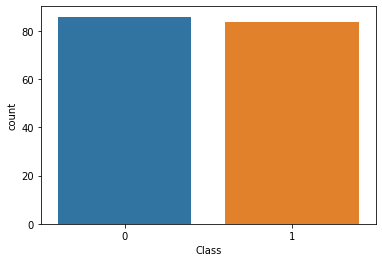

In [6]:
divorce['Class'].value_counts()
sns.countplot(divorce['Class'])

In [7]:
# some checking on our data
# divorce.dtypes
# divorce.Class.describe()
# divorce['Class'].describe()
# divorce.Atr1.value_counts()
# divorce.Atr1.unique()
# divorce.mean(axis=1)
# divorce.Atr2.value_counts().plot(kind='bar')

# **Preprocessing**



1. We are checking for null values and removing them. If we encounter a row which has null values, then replace that values with mean of the rest of the values in row.
2. We are sorting the data into ascending order.
3. Then splitting of dataset into training and testing set is done.
4. We are normalizing the dataset in the end.



In [8]:
# Check for null values
total = divorce.isnull().sum().sort_values(ascending=False)

In [9]:
X = divorce.drop('Class', axis=1)
y = divorce['Class']

In [10]:
# Split Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 42, shuffle=True)

print((X_train.shape))

(102, 54)


In [11]:
# Normalize data - not necessary when using StandardScaler() as below
# x = divorce.values #returns a numpy array
# print(x)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# divorce = pd.DataFrame(x_scaled)
# divorce

In [12]:
#To normalise the values of the dataset to improve the model accuracy.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Random Forest Classifier**


Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

sk-learn is the python module which is used to import Random Forest classifier. We split the dataset into training and testing dataset in the ratio of 60:40. The output is generated after training and then 40% of the data is used for testing in which we obtained 97.1% accuracy and time for execution = 0.35 sec.

**Pros of RF classifiers**

1. Excellent Predictive Powers
2. Easy Data Preperation
3. Suitable for large data

**Cons of RF classifiers**

1. Overfitting Risk
2. Parameter Complexity
3. Limited with Regression


In [13]:
#to calculate time complexity
start = time.time()

#Create a RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
pred_rfc = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.9705882352941176

In [15]:
end = time.time()
print("Random-Forest execution time: {0:.5} seconds \n".format(end-start))

Random-Forest execution time: 0.26791 seconds 



In [16]:
# classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        36

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



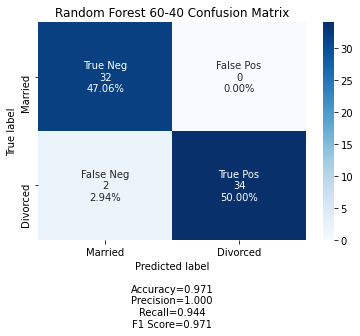

In [17]:
rf_cf_matrix = confusion_matrix(y_test, pred_rfc)
make_confusion_matrix(rf_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = RF_TITLE)

## Random Forest Performance

> **ACCURACY** = 97.05882352 %

> **Precision** = 100 %

> **Recall** = 94.4 %

> **F1 Score** = 97.1 %

> **Random-Forest execution time** : 0.35047 seconds 

# **SVM Classifier**

* Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression.

* We have used linear kernel function for SVM so that it can predict 2 outputs, married or divorced.

* SK-learn is the python module which is used to import Random Forest classifier. We split the dataset into training and testing dataset in the ratio of 60:40. The output is generated after training and then 40% of the data is used for testing in which we obtained 98.5% accuracy and time for execution= 0.03 sec.



**Pros of SVM classifiers**

1. SVM classifiers offers great accuracy and work well with high dimensional space. 
2. SVM classifiers basically use a subset of training points hence in result uses very less memory.

**Cons of SVM classifiers**

1. They have high training time hence in practice not suitable for large datasets. 
2. Another disadvantage is that SVM classifiers do not work well with overlapping classes.


In [18]:
#to calculate time complexity
start = time.time()

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
#Predict the response for test dataset
pred_clf = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# clf.score(X_test,y_test)
# Model Accuracy: how often is the classifier correct?
# print("Accuracy:", metrics.accuracy_score(y_test, pred_clf))
print("Accuracy2:", clf.score(X_test,y_test))

Accuracy2: 0.9852941176470589


In [20]:
end = time.time()
print("SVM execution time: {0:.5} seconds \n".format(end-start))

SVM execution time: 0.03232 seconds 



In [21]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.99        36

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.99        68
weighted avg       0.99      0.99      0.99        68



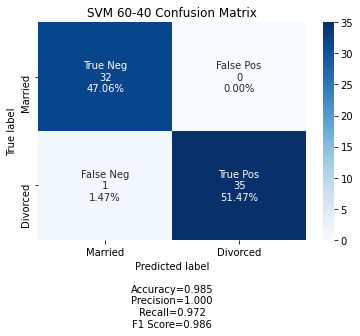

In [22]:
svm_cf_matrix = confusion_matrix(y_test, pred_clf)
make_confusion_matrix(svm_cf_matrix, group_names = LABELS, categories = CATEGORIES, title = SVM_TITLE)

## SVM Performance

> **ACCURACY** = 98.529 %

> **Precision** = 100 %

> **Recall** = 97.2 %

> **F1 Score** = 98.61 %

> **SVM execution time** : 0.030847 seconds 

#**Conclusion**
We can conclude that SVM classifier has greater accuracy and has faster execution time than Random Forest Classifier. The confusion matrix for both the models is shown so the comparison between models can be done easily. We have to wisely select the predictive model according to application considering the pros and cons of the model.